In [69]:
import numpy as np
import pandas as pd

In [70]:
df=pd.read_csv('/content/spam1.csv')

In [71]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3810,ham,Excellent! Wish we were together right now!,NaN,NaN,NaN
5144,ham,I'm in office now da:)where are you?,NaN,NaN,NaN
211,ham,Home so we can always chat,NaN,NaN,NaN
5280,ham,"Vikky, come around &lt;TIME&gt; ..",NaN,NaN,NaN
4692,ham,Tessy..pls do me a favor. Pls convey my birthd...,NaN,NaN,NaN


Data Cleaning

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [73]:
# since col 2,3,4 have very few values we will drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [74]:
df.sample(5)

,v1,v2
2165,ham,I'm not coming home 4 dinner.
3348,ham,Oh is it! Which brand?
2640,ham,Pandy joined 4w technologies today.he got job..
3812,ham,Pls i wont belive god.not only jesus.
5273,ham,Its too late:)but its k.wish you the same.


In [75]:
df.rename(columns={'v1':'class','v2':'text'},inplace=True)

In [76]:
df.sample(5)

,class,text
1466,ham,Your account has been refilled successfully by...
5328,ham,Sweet heart how are you?
275,ham,Thanx...
4282,ham,Science tells that chocolate will melt under t...
1740,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...


In [77]:
# to convert ham/spam to 1/0
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [78]:
df['class']=encoder.fit_transform(df['class'])

In [79]:
df.sample(5)

,class,text
4671,1,Customer service announcement. We recently tri...
3710,0,"Sorry pa, i dont knw who ru pa?"
3948,0,HMM yeah if your not too grooved out! And im l...
5478,0,No probably &lt;#&gt; %.
2712,0,Hey you still want to go for yogasana? Coz if ...


In [80]:
# check missing values
df.isnull().sum()

class    0
text     0
dtype: int64

In [81]:
# check for duplicate values
df.duplicated().sum()

403

In [82]:
# drop the duplicates
df=df.drop_duplicates(keep='first')

In [83]:
df.duplicated().sum()

0

In [84]:
df.shape

(5169, 2)

EDA

In [85]:
# percentage of ham and spam
df.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
df['class'].value_counts()

class
0    4516
1     653
Name: count, dtype: int64

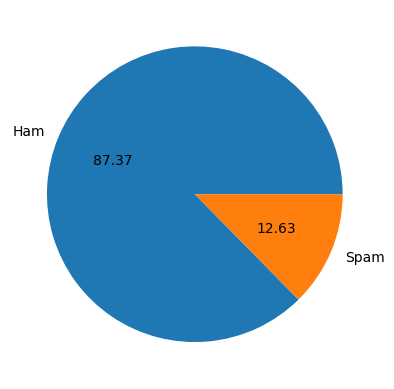

In [87]:
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

In [88]:
# data is imbalanced as there is a lot of ham compareed to spam

In [89]:
import nltk

In [90]:
nltk.download('punkt') # dependencies of nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
df['num_charecters']=df['text'].apply(len)
df.head()

,class,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [92]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,class,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [93]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,class,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [94]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [95]:
# ham
df[df['class']==0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [96]:
# spam
df[df['class']==1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_charecters', ylabel='Count'>

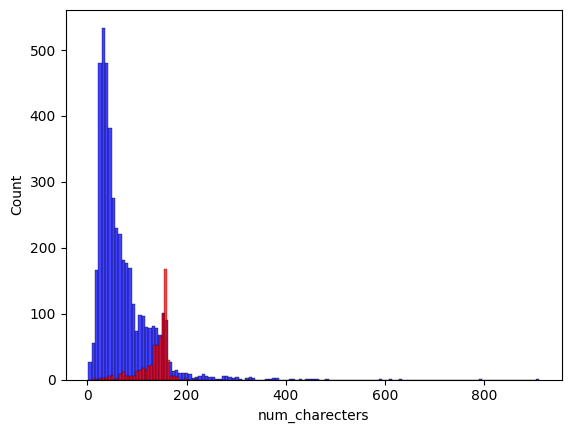

In [97]:
import seaborn as sns
sns.histplot(df[df['class']==0]['num_charecters'],color='blue')
sns.histplot(df[df['class']==1]['num_charecters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

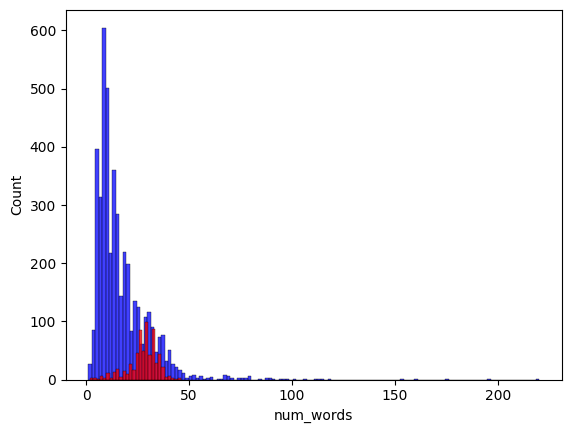

In [98]:
sns.histplot(df[df['class']==0]['num_words'],color='blue')
sns.histplot(df[df['class']==1]['num_words'],color='red')

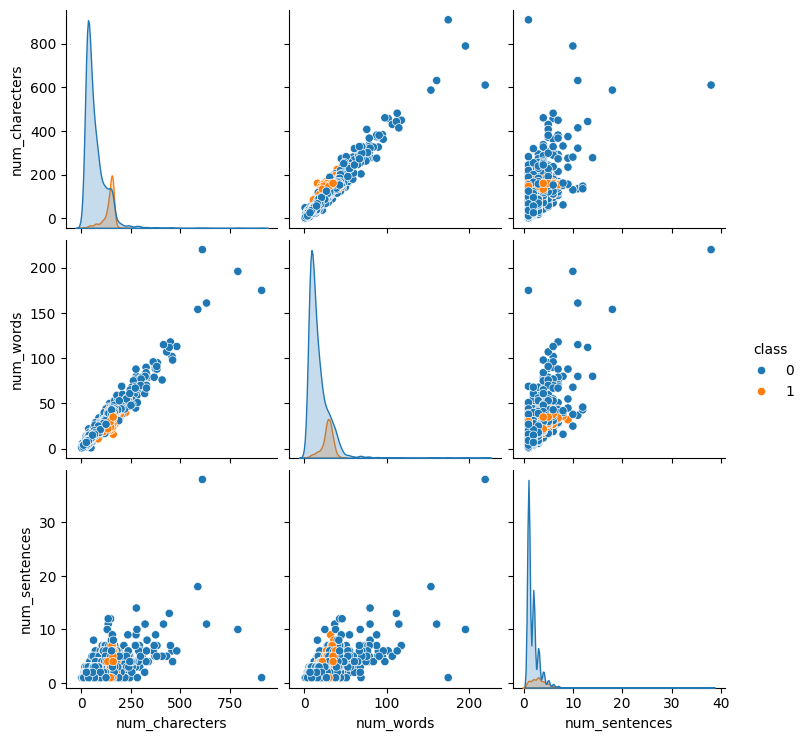

In [99]:
sns.pairplot(df,hue='class')

In [100]:
# corr = df.corr()
# sns.heatmap(corr, cmap="Blues", annot=True)

Data Preprocessing


1. lower case
2. tokenization
3. removing special charecters
4. removing stop words (help in making sentence but not meaningful) and punctuation
5. stemming (converting dance,dancing,danced to dance)



In [101]:
from nltk.corpus import stopwords
import string
# stopwords.words('english')
# string.punctuation

In [102]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
# ps.stem('loving')

In [103]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  ans=[]
  for i in text:
    if i.isalnum():
      ans.append(i)

  text=ans[:]
  ans.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      ans.append(i)

  text=ans[:]
  ans.clear()

  for i in text:
    ans.append(ps.stem(i))

  return " ".join(ans)

In [104]:
transform_text('Say what you want to know about the Eiffel tower quickly! loving') #trial for transform_text

'say want know eiffel tower quickli love'

In [105]:
df['transform_text']=df['text'].apply(transform_text)
df.head()

,class,text,num_charecters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [106]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

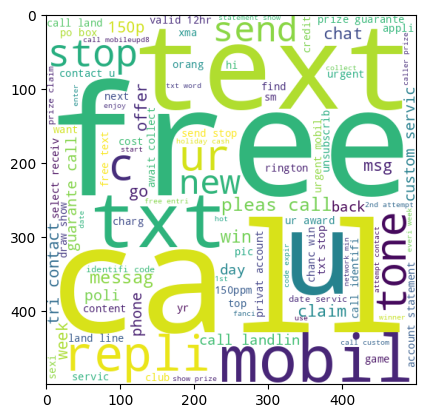

In [107]:
spam_wc=wc.generate(df[df["class"]==1]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

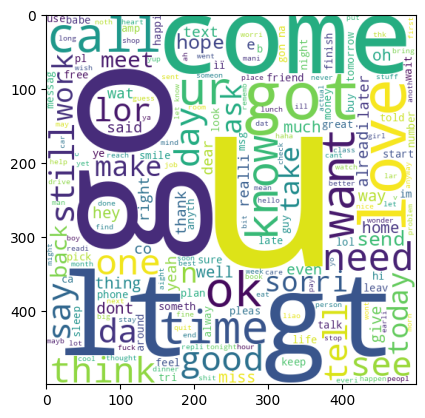

In [108]:
ham_wc=wc.generate(df[df["class"]==0]['transform_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [109]:
spam_corpus=[]
for msg in df[df['class']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus) #no. of words in spam class of transformed text

9939

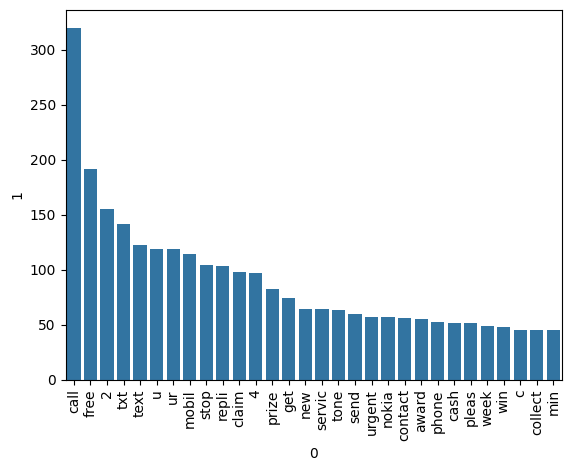

In [110]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [111]:
ham_corpus=[]
for msg in df[df['class']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
len(ham_corpus) #no. of words in ham class of transformed text

35404

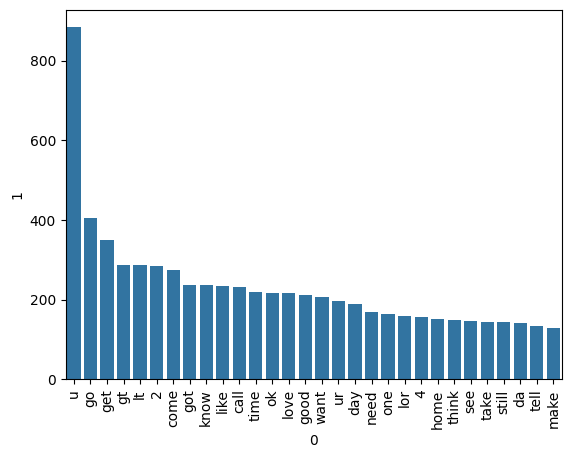

In [112]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [113]:
# Naive Bayes
# because it is good for textual data
# text vectorization using bag of words

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [114]:
# X=cv.fit_transform(df['transform_text']).toarray()
X=tfidf.fit_transform(df['transform_text']).toarray()
X.shape

(5169, 6708)

In [115]:
y=df['class'].values

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [118]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [119]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [120]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [121]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [122]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [123]:
# tfidf --> mnb gives precision of 1.0 which is the best as we don't want false positive it is ham as spam

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [124]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [125]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [126]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [127]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [128]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [129]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [130]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [131]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [132]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


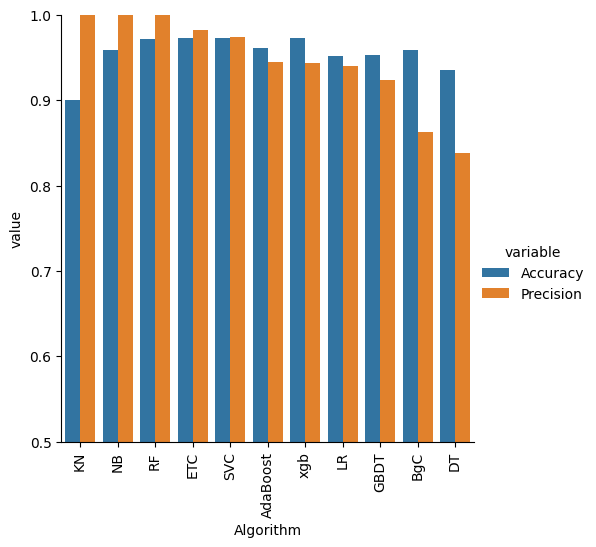

In [133]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [134]:
# best algorithm is random forest for the current iteration as precision is an important parameter for us and we can even use multinomial naive bayes